In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import sys
sys.path.append('../../../../infrastructure/tools')
from utilities import *
from plotting import *

In [2]:
raw_data = pd.read_csv("../../../data/complaints.csv")

In [3]:
raw_data.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
raw_data.shape

(162421, 3)

In [5]:
raw_data.narrative.fillna('unknown',inplace=True)

In [6]:
raw_data = raw_data.rename(columns={'Unnamed: 0':'complaint_id'})

In [7]:
utilities.cat_desc(raw_data,['product'])['product']

,product,Frequency,Percent,Cum Frequency,Cum Percent
0,credit_card,15566,9.583736,15566,9.583736
1,credit_reporting,91179,56.137445,106745,65.721181
2,debt_collection,23150,14.253083,129895,79.974264
3,mortgages_and_loans,18990,11.691838,148885,91.666102
4,retail_banking,13536,8.333898,162421,100.000000
5,missing,0,0.000000,162421,100.000000


In [8]:
raw_data['narrative_len'] = raw_data['narrative'].str.len()

<Axes: >

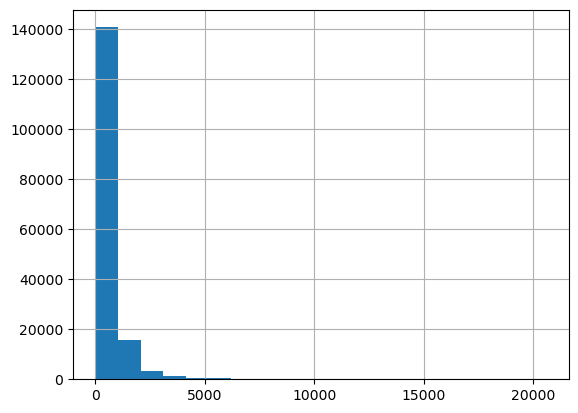

In [9]:
raw_data['narrative_len'].hist(bins=20)

In [10]:
new_vars = []
for p in raw_data['product'].unique():
    raw_data[f'has_{p}'] = raw_data['narrative'].str.contains(p)
    new_vars.append(f'has_{p}')

In [11]:
new_vars

['has_credit_card',
 'has_retail_banking',
 'has_credit_reporting',
 'has_mortgages_and_loans',
 'has_debt_collection']

In [12]:
cat_desc = utilities.cat_desc(raw_data,new_vars)

In [13]:
for v in new_vars:
    print(cat_desc[v])

  has_credit_card  Frequency  Percent  Cum Frequency  Cum Percent
0           False     162421    100.0         162421        100.0
1         missing          0      0.0         162421        100.0
  has_retail_banking  Frequency  Percent  Cum Frequency  Cum Percent
0              False     162421    100.0         162421        100.0
1            missing          0      0.0         162421        100.0
  has_credit_reporting  Frequency  Percent  Cum Frequency  Cum Percent
0                False     162421    100.0         162421        100.0
1              missing          0      0.0         162421        100.0
  has_mortgages_and_loans  Frequency  Percent  Cum Frequency  Cum Percent
0                   False     162421    100.0         162421        100.0
1                 missing          0      0.0         162421        100.0
  has_debt_collection  Frequency  Percent  Cum Frequency  Cum Percent
0               False     162421    100.0         162421        100.0
1             missin

In [14]:
raw_data['narrative'][0]

'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called 

In [15]:
raw_data.head(1)

,complaint_id,product,narrative,narrative_len,has_credit_card,has_retail_banking,has_credit_reporting,has_mortgages_and_loans,has_debt_collection
0,0,credit_card,purchase order day shipping amount receive pro...,1705,False,False,False,False,False


In [16]:
import re
RE_SUSPICIOUS = re.compile(r'[&#<>\[\]\\]')

In [17]:
def impurity(text, min_len=0):
    if text == None or len(text) < min_len:
        return 0
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)

In [18]:
print(impurity(raw_data.at[0,'narrative']))

0.0


In [19]:
raw_data.at[0,'narrative']

'purchase order day shipping amount receive product week sent followup email exact verbiage paid two day shipping received order company responded im sorry inform due unusually high order volume order shipped several week stock since early due high demand although continuing take order guaranteeing receive order place due time mask order exact shipping date right however guarantee ship soon soon delivers product u getting small shipment shipping first come first served basis appreciate patience fulfill order quickly recommend keeping order lose place line cancel distributor stock moment prefer cancel please note ask via email cancel accordance cancellation policy agreed checkout electronic inventory online requested order canceled refund issued canceled order sent verification order canceled refunded item particulate respirator refunded subtotal shipping tax total usd visa ending refund called disputed amount stated nothing needed submitted address issue recharged item removing called 